In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [2]:
masa_1 = [30,30,50,30,30]
angulo_1 = [0,0,45,45,60]
masa_2 = [30,50,30,30,30]
angulo_2 = [90,90,180,135,120]
masa_3 =[43.2,58.3,35.4,43.2,53.4]
angulo_3 = [224,239,261,266,270]

In [4]:
tabla = pd.DataFrame({'Medida': ['1', '2', '3', '4', '5'], 'Masa 1 (g)': masa_1, 'Ángulo 1 (°)': angulo_1, 'Masa 2 (g)': masa_2, 'Ángulo 2 (°)': angulo_2, 'Masa 3 (g)': masa_3, 'Ángulo 3 (°)': angulo_3})
tabla

,Medida,Masa 1 (g),Ángulo 1 (°),Masa 2 (g),Ángulo 2 (°),Masa 3 (g),Ángulo 3 (°)
0,1,30,0,30,90,43.2,224
1,2,30,0,50,90,58.3,239
2,3,50,45,30,180,35.4,261
3,4,30,45,30,135,43.2,266
4,5,30,60,30,120,53.4,270


In [9]:
def fuerza(m):
    f = m*(9.8)
    return f

f_1 = [fuerza(masa_1[0]), fuerza(masa_2[0]), fuerza(masa_3[0])]
f_2 = [fuerza(masa_1[1]), fuerza(masa_2[1]), fuerza(masa_3[1])]
f_3 = [fuerza(masa_1[2]), fuerza(masa_2[2]), fuerza(masa_3[2])]
f_4 = [fuerza(masa_1[3]), fuerza(masa_2[3]), fuerza(masa_3[3])]
f_5 = [fuerza(masa_1[4]), fuerza(masa_2[4]), fuerza(masa_3[4])]

In [13]:
tabla_fuerza = pd.DataFrame({'Medida': ['1', '2', '3', '4', '5'], 'Fuerza 1 (N)': [f_1[0], f_2[0], f_3[0], f_4[0], f_5[0]], 'Fuerza 2 (N)': [f_1[1], f_2[1], f_3[1], f_4[1], f_5[1]], 'Fuerza 3 (N)': [f_1[2], f_2[2], f_3[2], f_4[2], f_5[2]]})
tabla_fuerza

,Medida,Fuerza 1 (N),Fuerza 2 (N),Fuerza 3 (N)
0,1,294.0,294.0,423.36
1,2,294.0,490.0,571.34
2,3,490.0,294.0,346.92
3,4,294.0,294.0,423.36
4,5,294.0,294.0,523.32


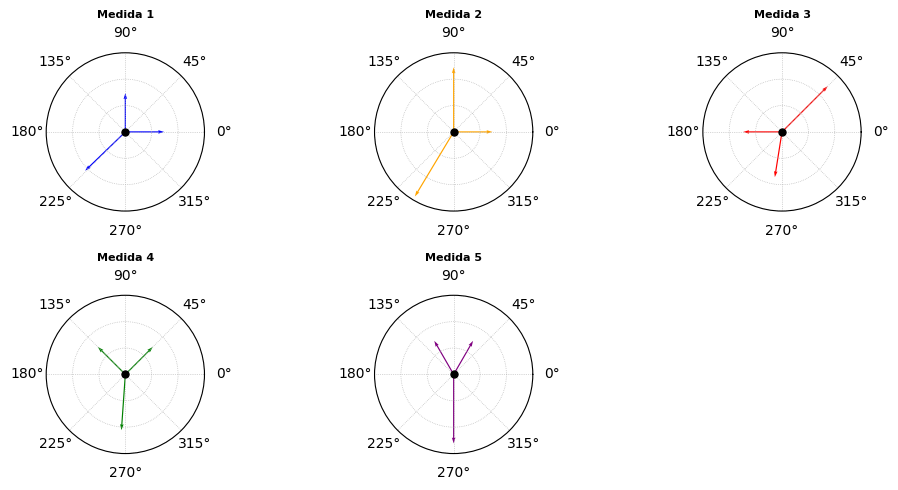

In [65]:
fig = plt.figure(figsize=(10, 5), layout='tight')
spec = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(spec[0,0], projection='polar')
ax1.set_title('Medida 1',size = 8, weight = 'bold')
ax1.set_theta_direction(1)
ax1.set_theta_zero_location('E')
ax1.set_ylim(0, 600)
ax1.set_yticklabels([])
ax1.plot(0, 1, color='black', marker='o', markersize=5)
ax1.grid(True, linestyle=':', linewidth=0.5)  
ax1.quiver(0, 0, np.radians(angulo_1[0]), f_1[0], color='blue', scale=1, scale_units='xy', angles='xy')
ax1.quiver(0, 0, np.radians(angulo_2[0]), f_1[1], color='blue', scale=1, scale_units='xy', angles='xy')
ax1.quiver(0, 0, np.radians(angulo_3[0]), f_1[2], color='blue', scale=1, scale_units='xy', angles='xy')
ax2 = fig.add_subplot(spec[0,1], projection='polar')
ax2.set_title('Medida 2',size = 8, weight = 'bold')
ax2.set_theta_direction(1)
ax2.set_theta_zero_location('E')
ax2.set_ylim(0, 600)
ax2.set_yticklabels([])
ax2.plot(0, 1, color='black', marker='o', markersize=5)
ax2.grid(True, linestyle=':', linewidth=0.5)
ax2.quiver(0, 0, np.radians(angulo_1[1]), f_2[0], color='orange', scale=1, scale_units='xy', angles='xy')
ax2.quiver(0, 0, np.radians(angulo_2[1]), f_2[1], color='orange', scale=1, scale_units='xy', angles='xy')
ax2.quiver(0, 0, np.radians(angulo_3[1]), f_2[2], color='orange', scale=1, scale_units='xy', angles='xy')
ax3 = fig.add_subplot(spec[0,2], projection='polar')
ax3.set_title('Medida 3',size = 8, weight = 'bold')
ax3.set_theta_direction(1)
ax3.set_theta_zero_location('E')
ax3.set_ylim(0, 600)
ax3.set_yticklabels([])
ax3.plot(0, 1, color='black', marker='o', markersize=5)
ax3.grid(True, linestyle=':', linewidth=0.5)
ax3.quiver(0, 0, np.radians(angulo_1[2]), f_3[0], color='red', scale=1, scale_units='xy', angles='xy')
ax3.quiver(0, 0, np.radians(angulo_2[2]), f_3[1], color='red', scale=1, scale_units='xy', angles='xy')
ax3.quiver(0, 0, np.radians(angulo_3[2]), f_3[2], color='red', scale=1, scale_units='xy', angles='xy')
ax4 = fig.add_subplot(spec[1,0], projection='polar')
ax4.set_title('Medida 4',size = 8, weight = 'bold')
ax4.set_theta_direction(1)
ax4.set_theta_zero_location('E')
ax4.set_ylim(0, 600)
ax4.set_yticklabels([])
ax4.plot(0, 1, color='black', marker='o', markersize=5)
ax4.grid(True, linestyle=':', linewidth=0.5)
ax4.quiver(0, 0, np.radians(angulo_1[3]), f_4[0], color='green', scale=1, scale_units='xy', angles='xy')
ax4.quiver(0, 0, np.radians(angulo_2[3]), f_4[1], color='green', scale=1, scale_units='xy', angles='xy')
ax4.quiver(0, 0, np.radians(angulo_3[3]), f_4[2], color='green', scale=1, scale_units='xy', angles='xy')
ax5 = fig.add_subplot(spec[1,1], projection='polar')
ax5.set_title('Medida 5',size = 8, weight = 'bold')
ax5.set_theta_direction(1)
ax5.set_theta_zero_location('E')
ax5.set_ylim(0, 600)
ax5.set_yticklabels([])
ax5.plot(0, 1, color='black', marker='o', markersize=5)
ax5.grid(True, linestyle=':', linewidth=0.5)
ax5.quiver(0, 0, np.radians(angulo_1[4]), f_5[0], color='purple', scale=1, scale_units='xy', angles='xy')
ax5.quiver(0, 0, np.radians(angulo_2[4]), f_5[1], color='purple', scale=1, scale_units='xy', angles='xy')
ax5.quiver(0, 0, np.radians(angulo_3[4]), f_5[2], color='purple', scale=1, scale_units='xy', angles='xy')



# ax1.plot(np.radians(angulo_1), f_1[0], marker='o')
# ax1.set_rticks([0, 20, 40, 60, 80, 100])

plt.show()